* **Theoretical Deep Dive:**
    1.  What is the fundamental principle behind intensity-based thresholding for image segmentation?
    2.  Differentiate between global and local (adaptive) thresholding. When would you prefer one over the other?
    3.  How does Otsu's method automatically determine an optimal threshold? Explain the mathematical intuition behind maximizing inter-class variance or minimizing intra-class variance.
    4.  What are the common challenges with thresholding methods (e.g., uneven illumination, multiple objects with similar intensities)?

* **Practical Implementation/Application:**
    1.  **Manual Global Thresholding:**
        * Load a grayscale image (e.g., a simple document scan or an image with clear foreground/background distinction).
        * Write code to apply a manual global threshold. Display the original image, a histogram of its pixel intensities, and the resulting binary (segmented) image.
        * **Experiment:** Try at least 3 different manual threshold values and observe their effects.
    2.  **Otsu's Thresholding:**
        * Apply `cv2.threshold` with `cv2.THRESH_OTSU` to the same image.
        * **Challenge (Conceptual Implementation):** *Without looking at the full OpenCV source,* sketch out the Python pseudo-code or outline the steps you would take to implement Otsu's method from scratch. Focus on the core logic of iterating through possible thresholds and calculating variances. (You don't need to fully code it unless you want an extra challenge, but understanding the steps is key).
    3.  **Adaptive Thresholding:**
        * Find an image with uneven illumination (e.g., a photo taken with a spotlight, or text on a paper with shadows).
        * Apply `cv2.adaptiveThreshold` using both `cv2.ADAPTIVE_THRESH_MEAN_C` and `cv2.ADAPTIVE_THRESH_GAUSSIAN_C`. Experiment with different `blockSize` and `C` values. Display the results.

* **Analytical Challenges:**
    1.  **Comparison:** Compare the results of manual, Otsu's, and adaptive thresholding on your chosen images. For each method, note down:
        * Its effectiveness in separating foreground/background.
        * Its robustness to noise or illumination variations.
        * Scenarios where it performs well and where it fails.
    2.  **Application Scenario:** Propose a real-world scenario where thresholding alone would be sufficient for segmentation and one where it would clearly fail. Explain why. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import os
from pathlib import Path
from glob import glob
import random

In [2]:
path = Path('../data')

In [26]:
images = list(path.glob('BSR/BSDS500/data/images/train/*.jpg'))
len(images)

200

../data/BSR/BSDS500/data/images/train/35008.jpg


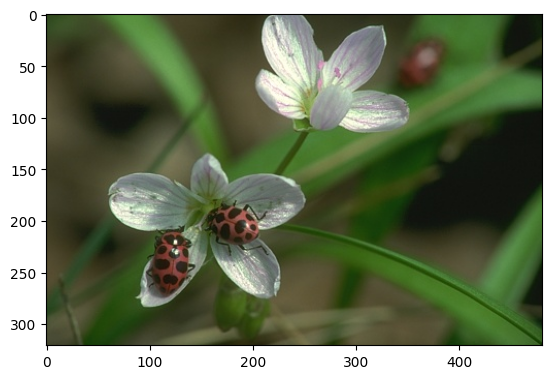

In [27]:
sample_path = random.choice(images)
print(sample_path)
img1 = cv2.imread(sample_path)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.show()

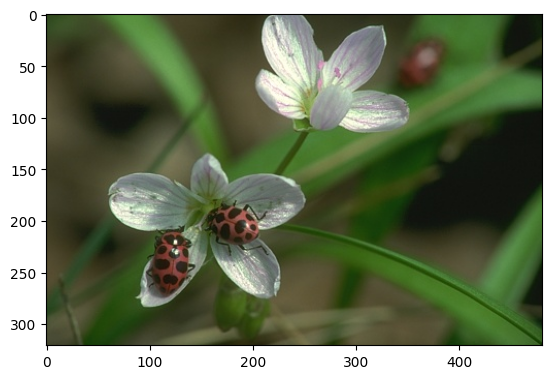

In [28]:
# sample_path = '../data/BSR/BSDS500/data/images/train/22090.jpg'
sample = cv2.imread(sample_path)
sample = cv2.cvtColor(sample, cv2.COLOR_BGR2RGB)
plt.imshow(sample)
plt.show()

# Simple Thresholding

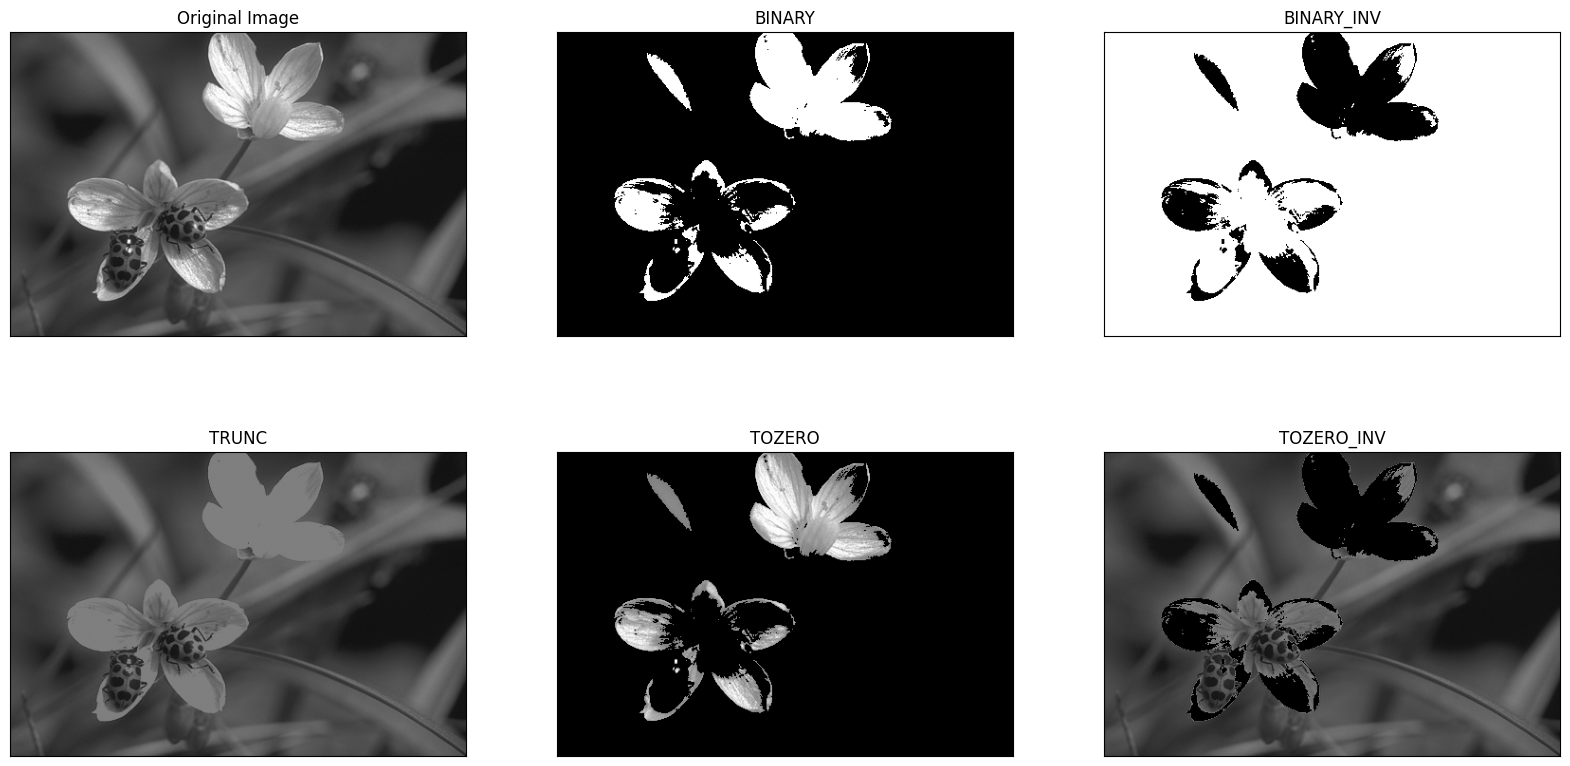

In [29]:
# https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html
img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(20, 10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Adaptive Thresholding

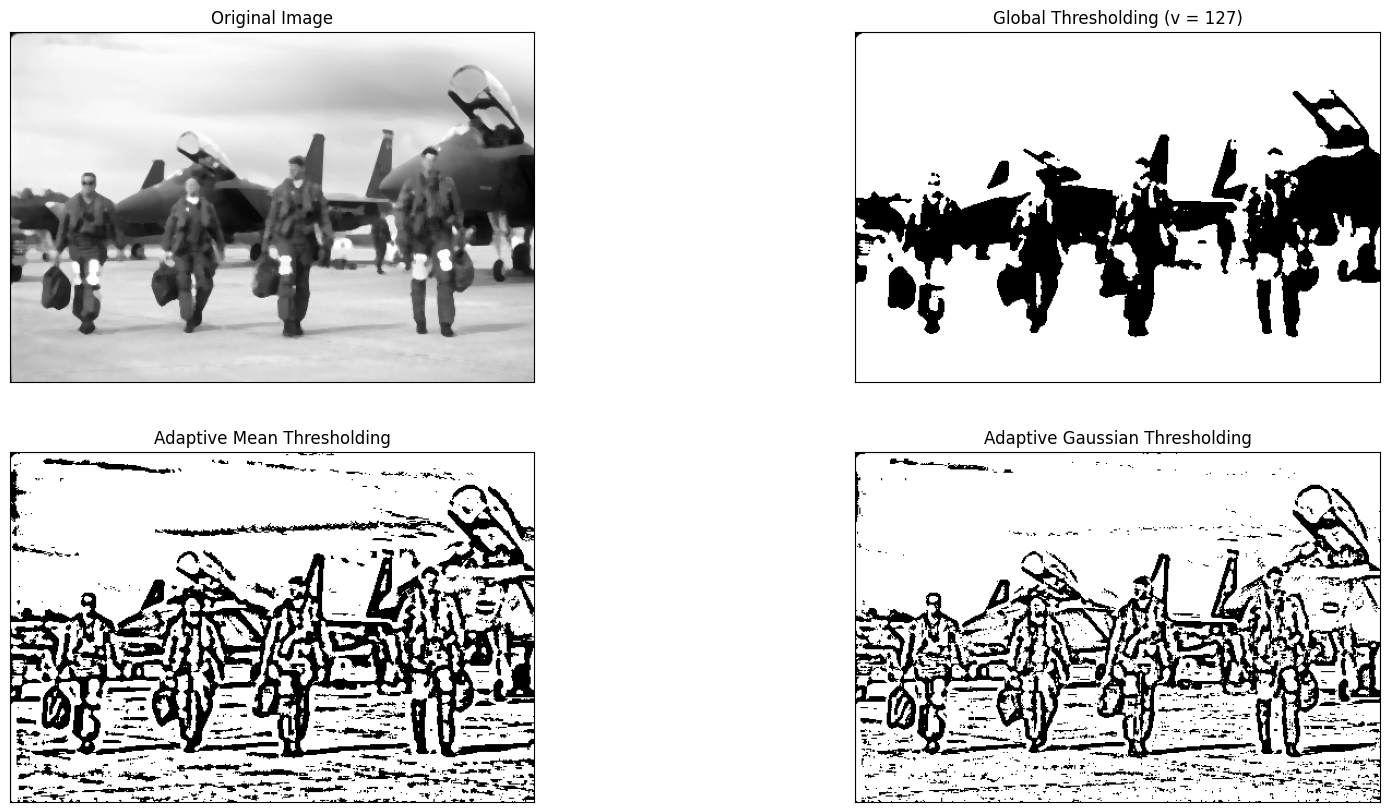

In [22]:
img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(img,5)
plt.figure(figsize=(20, 10))
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Otsu's Thresholding

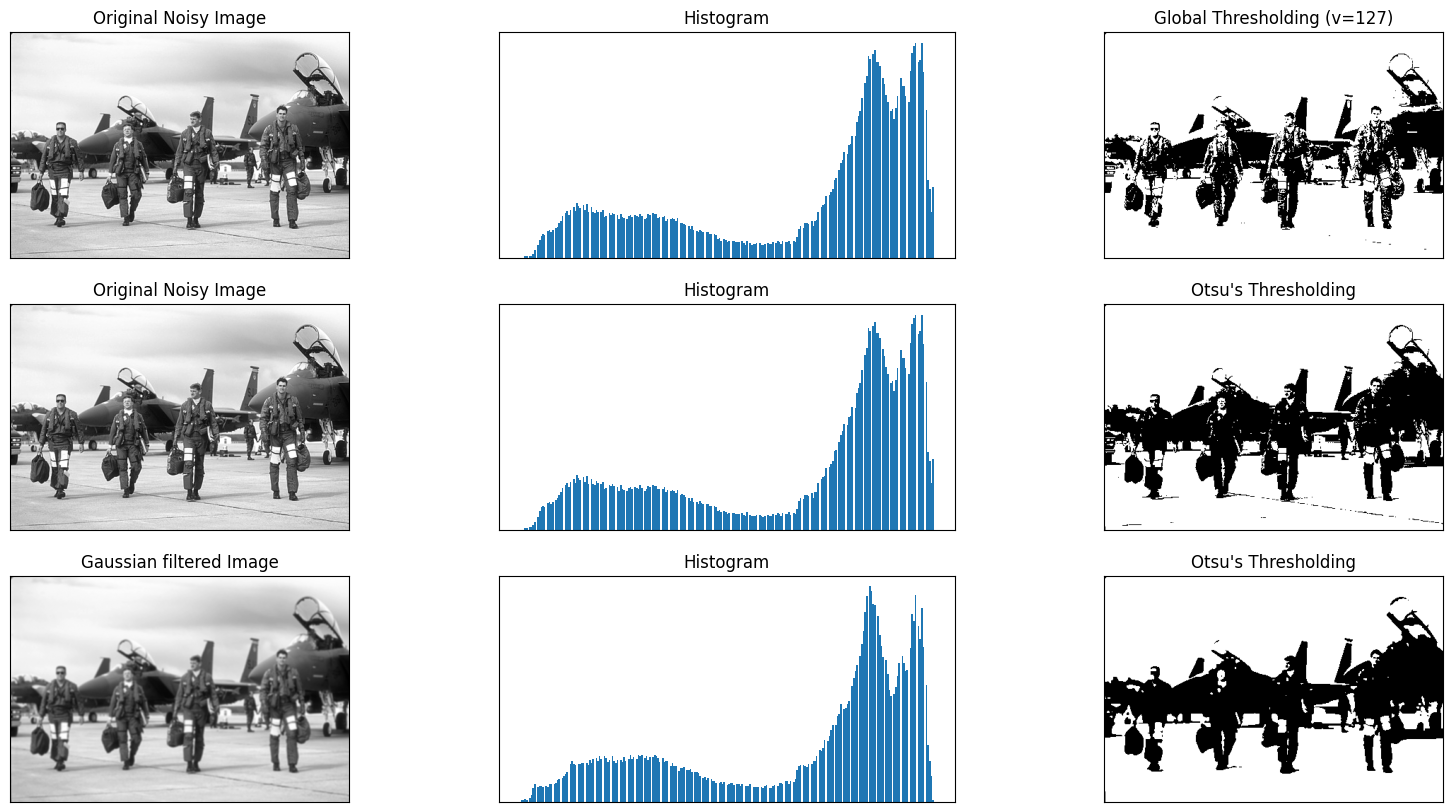

In [24]:
img = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20, 10))

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

**References:**
1. Otsu's thresholding : https://www.youtube.com/watch?v=jUUkMaNuHP8
2. OpenCV thresholding: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html